## Linear Regression
X-y split (y is the target variable, in this case, "total claim amount")


Train-test split.


Standardize the data (after the data split!).
Apply linear regression.
Model Interpretation.

(Wednesday)

Model Validation


Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.


In [1]:
import pandas as pd

url="/Users/miriamg/Documents/GitHub_Ironhack/Week 4 Machine learning/Last_marketing_customer_analysis_clean.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [55]:
numerical_df = df.select_dtypes(include ='number')
numerical_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [3]:
import pandas as pd
import seaborn as sns

## X-y split

In [4]:
X= numerical_df[['customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'month']]
y = numerical_df[['total_claim_amount']]

## Train-test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X,y, random_state=42)# consistency with the random state is important

In [7]:
y_train

,total_claim_amount
4716,897.600000
8775,504.000000
4754,542.016902
6569,571.200000
1438,504.000000
...,...
5734,777.600000
5191,470.400000
5390,331.200000
860,336.000000


## Standardize the data (after the data split!). Apply linear regression.

<AxesSubplot:>

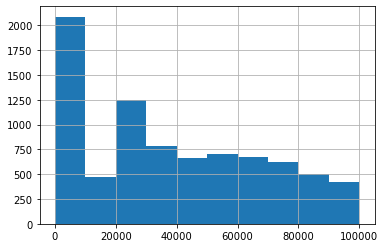

In [8]:
X_train["income"].hist()

## Applying min_max scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [10]:
scaler= MinMaxScaler()

In [51]:
X_train_scaler = scaler.fit_transform(X_train)

In [52]:
X_test_scaler = scaler.transform(X_test)

<AxesSubplot:>

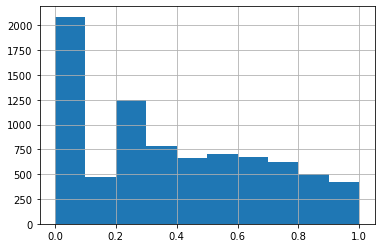

In [54]:
X_train["income"].hist()

<AxesSubplot:>

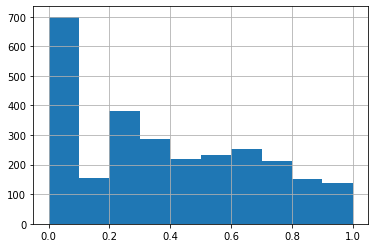

In [14]:
X_test["income"].hist()

<AxesSubplot:>

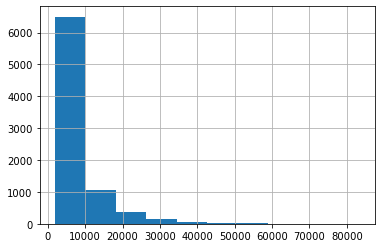

In [15]:
#For customer_lifetime_value

X_train["customer_lifetime_value"].hist()

## Applying Standard scaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train["customer_lifetime_value"]= scaler.fit_transform(X_train[["customer_lifetime_value"]])

<ipython-input-17-2fffeaef9e9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["customer_lifetime_value"]= scaler.fit_transform(X_train[["customer_lifetime_value"]])


<AxesSubplot:>

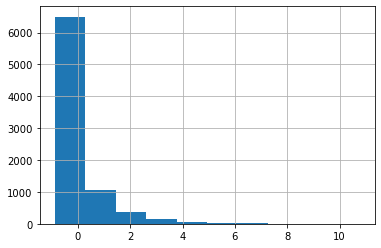

In [18]:
X_train["customer_lifetime_value"].hist()

In [19]:
X_test["customer_lifetime_value"]= scaler.transform(X_test[["customer_lifetime_value"]])

<ipython-input-19-52da1bc02008>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["customer_lifetime_value"]= scaler.transform(X_test[["customer_lifetime_value"]])


<AxesSubplot:>

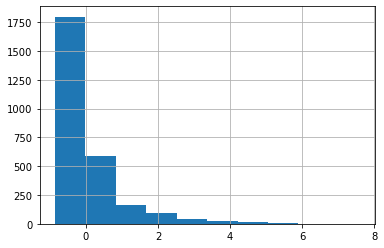

In [20]:
X_test["customer_lifetime_value"].hist()

### Applying PowerTransformer

In [21]:
pt = PowerTransformer()

In [22]:
X_train["customer_lifetime_value"] = pt.fit_transform (X_train[["customer_lifetime_value"]])

<ipython-input-22-092b8406db7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["customer_lifetime_value"] = pt.fit_transform (X_train[["customer_lifetime_value"]])


<AxesSubplot:>

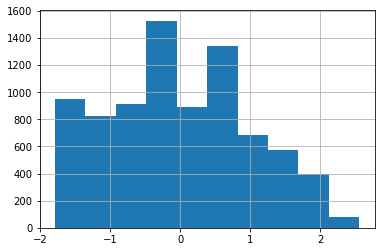

In [23]:
X_train["customer_lifetime_value"].hist()

In [24]:
X_test["customer_lifetime_value"] = pt.fit_transform (X_test[["customer_lifetime_value"]])

<ipython-input-24-38bd18cb041c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["customer_lifetime_value"] = pt.fit_transform (X_test[["customer_lifetime_value"]])


<AxesSubplot:>

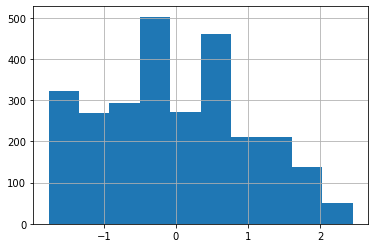

In [25]:
X_test["customer_lifetime_value"].hist()

In [26]:
""""Applying Linear regression meaning 

#y= 57.15539158+ -7.04825151e+00, -3.28432310e+02,  5.43072648e+00,
         1.75619785e-01, -1.80523505e-01, -6.56736711e-01,
         9.60489509e-01, -1.93818713e+00


...'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'month' """

'"Applying Linear regression meaning \n\n#y= 1.70530257e-13+ -2.00786015e-14\'customer_lifetime_value\' , -1.84630089e-13,  8.32667268e-17,\n        -8.79071121e-16,  1.90819582e-17, -2.36399442e-15,\n         3.73399228e-15,  1.00000000e+00,  2.56808192e-15\n\n\n...\'income\',\n       \'monthly_premium_auto\', \'months_since_last_claim\',\n       \'months_since_policy_inception\', \'number_of_open_complaints\',\n       \'number_of_policies\', \'month\' '

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [29]:
model.coef_

array([[-7.04825151e+00, -3.28432310e+02,  5.43072648e+00,
         1.75619785e-01, -1.80523505e-01, -6.56736711e-01,
         9.60489509e-01, -1.93818713e+00]])

In [30]:
model.intercept_

array([57.15539158])

## Predict the total_claim_amount

In [31]:
random_customer = X_test.sample()

In [32]:
random_customer

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
2098,-0.25358,0.607635,67,4.0,19,0.0,7,1


In [33]:
model.predict(random_customer)

array([[225.2920216]])

## Create predictions for the test set

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred= pd.DataFrame(y_pred)

In [36]:
y_test = y_test.reset_index(drop=True)

In [37]:
residuals_df= pd.concat([y_test, y_pred], axis=1)

In [38]:
residuals_df= residuals_df.rename(columns= {"total_claim_amount": "y_test", 0: "y_pred"})

In [39]:
residuals_df

,y_test,y_pred
0,475.423848,121.964626
1,350.400000,354.671227
2,482.400000,420.893999
3,673.342650,431.489478
4,302.400000,150.612707
...,...,...
2723,460.266881,586.776525
2724,405.883346,310.024026
2725,41.182611,204.623082
2726,364.800000,449.786305


In [40]:
residuals_df["residual"] = residuals_df["y_test"]- residuals_df["y_pred"]

In [41]:
residuals_df.head()

,y_test,y_pred,residual
0,475.423848,121.964626,353.459222
1,350.400000,354.671227,-4.271227
2,482.400000,420.893999,61.506001
3,673.342650,431.489478,241.853172
4,302.400000,150.612707,151.787293


## Calculating metrics

In [42]:
mean_error = residuals_df["residual"].mean()
mean_error

4.680186775206909

In [43]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [44]:
mse(y_test, y_pred)

40481.64471630266

In [45]:
mae(y_test, y_pred)

145.98073006660624

In [46]:
rmse= mse( y_test, y_pred, squared = False)
rmse

201.20050873768352

In [47]:
import numpy as np
np.sqrt(mse(y_test, y_pred))

201.20050873768352